# <b><span style='color:#F1A424'>AutoML - Multiclass Classification </span> </b>

## <b> Problem overview:</b>
    

**Dataset used: BMI Dataset**

**Features**:

- `gender`: Gender of person.
- `height`: Height of person.
- `weight`: Weight of person.

**Target Variable**:

- `bmi`: BMI value of person.

        
**Objective**:

The primary objective is typically to build a model that can accurately predict BMI of person.

**Usecase**:

Here, we will use AutoML(Automated Machine Learning) functionality to automate the entire process of developing a predictive model. It will perform feature exploration, feature engineering, data preparation, model training and evaluation on dataset in auto run and at end we will get leaderboard containined different models along with their performance. Model will also have rank associated with them which indicates which is best performing model for given data followed by other models.

In [1]:
# Importing AutoML from teradataml
from teradataml import AutoML, AutoClassifier

In [2]:
# Importing other important libraries
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data
from teradataml import TrainTestSplit

In [3]:
# Create the connection.
host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

Host:  ········
Username:  ········
Password:  ········


## <b><span style='color:#F1A424'>| 1.</span> Loading Dataset </b>

In [4]:
# Loading dataset from example data collection
load_example_data('teradataml','bmi')

In [5]:
# Fetching in teradata dataframe
bmi_df = DataFrame("bmi")

In [6]:
# first 5 rows
bmi_df.head()

gender,height,weight,bmi
Female,153,107,5
Female,169,97,4
Female,172,67,2
Female,151,64,3
Female,195,65,1
Female,160,131,5
Female,163,159,5
Female,157,110,5
Female,192,101,3
Female,169,103,4


In [7]:
# bmi_df dataset
bmi_df.shape

(500, 4)

In [8]:
# Performing sampling to get 80% for trainning and 20% for testing
bmi_df_sample = bmi_df.sample(frac = [0.8, 0.2])

In [9]:
bmi_df_sample.head()

gender,height,weight,bmi,sampleid
Female,172,67,2,1
Female,195,65,1,1
Female,160,131,5,1
Female,157,153,5,1
Female,171,152,5,1
Female,185,81,2,1
Female,197,114,3,2
Female,151,64,3,1
Female,169,97,4,1
Female,153,107,5,1


In [10]:
# Fetching train and test data
bmi_df_train= bmi_df_sample[bmi_df_sample['sampleid'] == 1].drop('sampleid', axis=1)
bmi_df_test = bmi_df_sample[bmi_df_sample['sampleid'] == 2].drop('sampleid', axis=1)

In [11]:
# train data shape
bmi_df_train.shape

(400, 4)

In [12]:
# test data shape
bmi_df_test.shape

(100, 4)

In [13]:
#train dataset
bmi_df_train.head()

gender,height,weight,bmi
Female,172,67,2
Female,195,65,1
Female,160,131,5
Female,157,153,5
Female,185,81,2
Female,175,120,4
Female,171,152,5
Female,151,64,3
Female,169,97,4
Female,153,107,5


In [14]:
# test dataset
bmi_df_test.head()

gender,height,weight,bmi
Female,146,104,5
Female,187,102,3
Female,196,131,4
Female,166,126,5
Female,182,84,3
Female,177,117,4
Female,167,135,5
Female,187,70,2
Female,183,96,3
Female,176,54,1


## <b><span style='color:#F1A424'>| 2.</span> Fitting AutoML </b>

In [15]:
# Creating AutoML instance
# Using all models from model training.
# Keeping early stopping timer threshold to 300 sec
# and verbose level 2 for detailed loggging

aml = AutoML(task_type="Classification",
             max_runtime_secs=300,
             verbose=2)

Feature Exploration started ...

Data Overview:
Total Rows in the data: 400
Total Columns in the data: 4

Column Summary:


ColumnName,Datatype,NonNullCount,NullCount,BlankCount,ZeroCount,PositiveCount,NegativeCount,NullPercentage,NonNullPercentage
weight,BIGINT,400,0,None,0,400,0,0.0,100.0
gender,VARCHAR(1024) CHARACTER SET UNICODE,400,0,0,None,None,None,0.0,100.0
bmi,BIGINT,400,0,None,10,390,0,0.0,100.0
height,BIGINT,400,0,None,0,400,0,0.0,100.0



Statistics of Data:


func,height,weight,bmi
min,140,50,0
std,16.421,32.983,1.353
25%,155,79,3
50%,169,106,4
75%,184,138,5
max,199,160,5
mean,169.305,106.15,3.77
count,400,400,400



Categorical Columns with their Distinct values:
ColumnName                DistinctValueCount
gender                    2         

No Futile columns found.

Target Column Distribution:


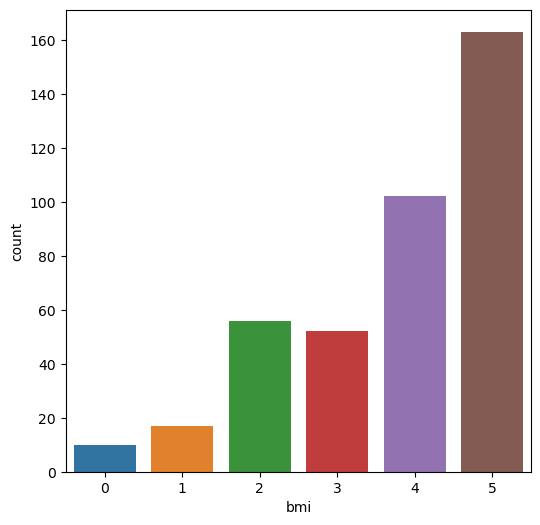

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
No outlier found!


gender,height,weight,bmi
Female,184,86,3
Female,196,50,0
Female,146,101,5
Female,164,160,5
Female,180,70,2
Female,182,84,3
Male,197,119,4
Male,163,123,5
Male,188,141,4
Male,197,149,4


Remaining Rows in the data: 395                                                         
Remaining Columns in the data: 4


All categorical columns seem to be significant.                                         


Dataset does not contain any feature related to dates.                                   


No Missing Values Detected.                                                              


No imputation is Required.                                                               


result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__1711971216203991"'17


['gender']


Training size : 0.8                                                                      
Testing size  : 0.2                                                                      


gender_0,gender_1,height,weight,bmi,id
1,0,150,70,4,39
1,0,146,101,5,55
1,0,164,160,5,63
1,0,160,131,5,71
1,0,182,84,3,87
1,0,192,90,2,95
0,1,197,119,4,12
0,1,163,123,5,20
0,1,197,149,4,36
0,1,187,138,4,44


gender_0,gender_1,height,weight,bmi,id
1,0,146,123,5,191
1,0,172,116,4,215
1,0,189,125,4,247
1,0,140,76,4,375
1,0,150,97,5,487
1,0,177,101,4,543
0,1,188,141,4,28
0,1,143,88,5,124
0,1,146,85,4,188
0,1,185,76,2,204


                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
No outlier found!


['height', 'weight']


['height', 'weight']


id,bmi,height,weight
2,5,0.2711864406779661,0.6909090909090909
4,4,0.1694915254237288,0.18181818181818182
5,4,0.9661016949152542,0.9
6,0,0.9491525423728814,0.0
8,5,0.1016949152542373,0.4636363636363636
9,2,0.6949152542372882,0.2545454545454545
7,4,0.7966101694915254,0.8
3,5,0.3898305084745763,0.6636363636363637
1,4,0.9661016949152542,0.6272727272727273
0,3,0.8813559322033898,0.4636363636363636


id,bmi,height,weight
127,5,0.3389830508474576,0.5363636363636364
191,5,0.1016949152542373,0.6636363636363637
188,4,0.1016949152542373,0.3181818181818182
207,5,0.288135593220339,0.5454545454545454
215,4,0.5423728813559322,0.6
212,5,0.1016949152542373,0.8
204,2,0.7627118644067796,0.23636363636363636
124,5,0.05084745762711865,0.34545454545454546
28,4,0.8135593220338984,0.8272727272727273
31,3,0.7457627118644068,0.32727272727272727


['height', 'weight']


['r_height', 'r_weight']


id,bmi,r_height,r_weight
2,5,0.2711864406779661,0.6909090909090909
4,4,0.1694915254237288,0.18181818181818182
5,4,0.9661016949152542,0.9
6,0,0.9491525423728814,0.0
8,5,0.1016949152542373,0.4636363636363636
9,2,0.6949152542372882,0.2545454545454545
7,4,0.7966101694915254,0.8
3,5,0.3898305084745763,0.6636363636363637
1,4,0.9661016949152542,0.6272727272727273
0,3,0.8813559322033898,0.4636363636363636


id,bmi,r_height,r_weight
127,5,0.3389830508474576,0.5363636363636364
191,5,0.1016949152542373,0.6636363636363637
188,4,0.1016949152542373,0.3181818181818182
207,5,0.288135593220339,0.5454545454545454
215,4,0.5423728813559322,0.6
212,5,0.1016949152542373,0.8
204,2,0.7627118644067796,0.23636363636363636
124,5,0.05084745762711865,0.34545454545454546
28,4,0.8135593220338984,0.8272727272727273
31,3,0.7457627118644068,0.32727272727272727


['height', 'weight']


gender_0,id,bmi,gender_1,height,weight
1,39,4,0,0.1694915254237288,0.18181818181818182
1,55,5,0,0.1016949152542373,0.4636363636363636
1,63,5,0,0.4067796610169492,1.0
1,71,5,0,0.3389830508474576,0.7363636363636363
1,87,3,0,0.711864406779661,0.3090909090909091
1,95,2,0,0.8813559322033898,0.36363636363636365
0,12,4,1,0.9661016949152542,0.6272727272727273
0,20,5,1,0.3898305084745763,0.6636363636363637
0,36,4,1,0.9661016949152542,0.9
0,44,4,1,0.7966101694915254,0.8


gender_0,id,bmi,gender_1,height,weight
1,191,5,0,0.1016949152542373,0.6636363636363637
1,215,4,0,0.5423728813559322,0.6
1,247,4,0,0.8305084745762712,0.6818181818181818
1,375,4,0,0.0,0.23636363636363636
1,487,5,0,0.1694915254237288,0.42727272727272725
1,543,4,0,0.6271186440677966,0.4636363636363636
0,28,4,1,0.8135593220338984,0.8272727272727273
0,124,5,1,0.05084745762711865,0.34545454545454546
0,188,4,1,0.1016949152542373,0.3181818181818182
0,204,2,1,0.7627118644067796,0.23636363636363636


['col_0', 'col_1', 'col_2']


                                                                                          
Multi-class classification is not supported by glm model. Skipping glm model.
                                                                                          
Multi-class classification is not supported by svm model. Skipping svm model.


response_column : bmi                                                                                                                                 
name : decision_forest
tree_type : Classification
min_impurity : (0.0, 0.1)
max_depth : (5, 6, 7, 8)
min_node_size : (1, 2)
num_trees : (-1, 10, 20)
Total number of models for decision_forest : 48
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

response_column : bmi
name : xgboost
model_type : Classification
column_sampling : (1, 0.6)
min_impurity : (0.0, 0.1)
lambda1 : (0.01, 0.1, 1, 10)
shrinkage_factor : (0.5, 0.1, 0.2)
max_depth : (5, 6, 7, 8)
min_node_size : (1, 2)
iter_num : (10, 20)
Total number of models for xgboost : 768
---------------------------------------------------------------------------------------------------------------------------------------------------------------

DECISIONFOREST_3                                                                                                                                                                                        
DECISIONFOREST_1                                                                          
DECISIONFOREST_2                                                                          


XGBOOST_0                                                                                                                                                                                               
XGBOOST_1                                                                                 
XGBOOST_2                                                                                 


KNN_9                                                                                                                                                                                                   
KNN_4                                                                                     
KNN_8                                                                                     


,Rank,Name,Feature selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,knn,lasso,0.913580,0.913580,0.913580,0.913580,0.827384,0.887807,0.848021,0.924417,0.913580,0.915674
1,2,knn,rfe,0.901235,0.901235,0.901235,0.901235,0.814757,0.873918,0.832148,0.915065,0.901235,0.902633
2,3,knn,pca,0.839506,0.839506,0.839506,0.839506,0.773280,0.813709,0.782788,0.847129,0.839506,0.839092
3,4,xgboost,rfe,0.790123,0.790123,0.790123,0.790123,0.675583,0.751840,0.698949,0.805505,0.790123,0.793859
4,5,xgboost,lasso,0.740741,0.740741,0.740741,0.740741,0.653292,0.717208,0.665397,0.746634,0.740741,0.737692
5,6,xgboost,pca,0.716049,0.716049,0.716049,0.716049,0.580357,0.517388,0.521377,0.680482,0.716049,0.685114
6,7,decision_forest,lasso,0.691358,0.691358,0.691358,0.691358,0.646907,0.712554,0.660279,0.765409,0.691358,0.714180
7,8,decision_forest,pca,0.679012,0.679012,0.679012,0.679012,0.564620,0.496140,0.513506,0.648733,0.679012,0.657981
8,9,decision_forest,rfe,0.666667,0.666667,0.666667,0.666667,0.577392,0.648882,0.584478,0.712661,0.666667,0.679094


In [16]:
# Fitting train data
aml.fit(bmi_df_train, bmi_df_train.bmi)

## <b><span style='color:#F1A424'>| 3.</span> Leaderboard : </b>

In [17]:
# Fetching Leaderboard
aml.leaderboard()

,Rank,Name,Feature selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,knn,lasso,0.913580,0.913580,0.913580,0.913580,0.827384,0.887807,0.848021,0.924417,0.913580,0.915674
1,2,knn,rfe,0.901235,0.901235,0.901235,0.901235,0.814757,0.873918,0.832148,0.915065,0.901235,0.902633
2,3,knn,pca,0.839506,0.839506,0.839506,0.839506,0.773280,0.813709,0.782788,0.847129,0.839506,0.839092
3,4,xgboost,rfe,0.790123,0.790123,0.790123,0.790123,0.675583,0.751840,0.698949,0.805505,0.790123,0.793859
4,5,xgboost,lasso,0.740741,0.740741,0.740741,0.740741,0.653292,0.717208,0.665397,0.746634,0.740741,0.737692
5,6,xgboost,pca,0.716049,0.716049,0.716049,0.716049,0.580357,0.517388,0.521377,0.680482,0.716049,0.685114
6,7,decision_forest,lasso,0.691358,0.691358,0.691358,0.691358,0.646907,0.712554,0.660279,0.765409,0.691358,0.714180
7,8,decision_forest,pca,0.679012,0.679012,0.679012,0.679012,0.564620,0.496140,0.513506,0.648733,0.679012,0.657981
8,9,decision_forest,rfe,0.666667,0.666667,0.666667,0.666667,0.577392,0.648882,0.584478,0.712661,0.666667,0.679094


## <b><span style='color:#F1A424'>| 4.</span> Best Performing Model : </b>

In [18]:
# Fetching best performing model for dataset
aml.leader()

,Rank,Name,Feature selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,knn,lasso,0.91358,0.91358,0.91358,0.91358,0.827384,0.887807,0.848021,0.924417,0.91358,0.915674


## <b><span style='color:#F1A424'>| 5.</span> Generating Prediction : </b>

### <b><span style='color:#F1A424'>| 5.1.</span> Generating prediction on default validation test data </b>

In [19]:
# Generating prediction and metrics on default test data
prediction = aml.predict()

knn lasso

 Prediction : 
    id  prediction  bmi
0  812           2    2
1  215           4    4
2  372           2    2
3  191           5    5
4   28           5    4
5   31           3    3
6  375           5    4
7  823           4    4
8  551           0    0
9  679           5    5

 Performance Metrics : 
       Prediction  Mapping  CLASS_1  CLASS_2  CLASS_3  CLASS_4  CLASS_5  CLASS_6  Precision    Recall        F1  Support
SeqNum                                                                                                                  
2               2  CLASS_3        0        0       10        0        0        0   1.000000  0.833333  0.909091       12
4               4  CLASS_5        0        0        0        0       18        1   0.947368  0.857143  0.900000       21
0               0  CLASS_1        2        1        0        0        0        0   0.666667  1.000000  0.800000        2
3               3  CLASS_4        0        0        0       10        1        0

array([[ 2,  0,  0,  0,  0,  0],
       [ 1,  2,  0,  0,  0,  0],
       [ 0,  2, 10,  0,  0,  0],
       [ 0,  0,  0, 10,  0,  0],
       [ 0,  0,  0,  1, 18,  2],
       [ 0,  0,  0,  0,  1, 32]], dtype=int64)

In [20]:
# Printing prediction
prediction.head()

id,prediction,bmi
124,5,5
188,4,4
191,5,5
204,2,2
212,5,5
215,4,4
207,5,5
127,5,5
31,3,3
28,5,4


### <b><span style='color:#F1A424'>| 5.2. </span> Generating prediction on external test data </b>

In [21]:
# Generating prediction and metrics on test data
prediction = aml.predict(bmi_df_test)

Data Transformation started ...
Performing transformation carried out in feature engineering phase ...

Updated dataset after performing target column transformation :


height,gender,id,weight,bmi
187,Male,28,62,1
175,Male,44,135,5
180,Male,52,75,2
186,Male,60,118,4
199,Male,76,156,4
154,Male,84,105,5
197,Female,15,114,3
168,Female,23,135,5
176,Female,31,54,1
191,Female,39,54,0


result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__1711971355186632"'

Updated dataset after performing categorical encoding :


height,gender_0,gender_1,id,weight,bmi
183,1,0,279,87,3
198,0,1,68,50,0
198,1,0,351,50,0
161,1,0,215,145,5
158,0,1,396,127,5
175,0,1,44,135,5
196,1,0,87,131,4
196,1,0,127,122,4
141,0,1,172,85,5
181,0,1,356,154,5


Performing transformation carried out in data preparation phase ...

Updated dataset after performing Lasso feature selection:


id,height,weight,bmi
215,161,145,5
68,198,50,0
351,198,50,0
279,183,87,3
87,196,131,4
127,196,122,4
172,141,85,5
356,181,154,5
380,162,157,5
292,179,83,3



Updated dataset after performing scaling on Lasso selected features :


id,bmi,height,weight
396,5,0.3050847457627119,0.7
172,5,0.01694915254237288,0.3181818181818182
356,5,0.6949152542372882,0.9454545454545454
372,5,0.2033898305084746,0.8727272727272727
380,5,0.3728813559322034,0.9727272727272728
292,3,0.6610169491525424,0.3
68,0,0.9830508474576272,0.0
351,0,0.9830508474576272,0.0
87,4,0.9491525423728814,0.7363636363636363
127,4,0.9491525423728814,0.6545454545454545



Updated dataset after performing RFE feature selection:


id,height,weight,bmi
372,152,146,5
279,183,87,3
236,183,105,3
380,162,157,5
87,196,131,4
127,196,122,4
396,158,127,5
44,175,135,5
172,141,85,5
356,181,154,5



Updated dataset after performing scaling on RFE selected features :


id,bmi,r_height,r_weight
396,5,0.3050847457627119,0.7
215,5,0.3559322033898305,0.8636363636363636
287,5,0.3559322033898305,0.9454545454545454
279,3,0.7288135593220338,0.33636363636363636
68,0,0.9830508474576272,0.0
351,0,0.9830508474576272,0.0
372,5,0.2033898305084746,0.8727272727272727
183,2,0.4915254237288136,0.34545454545454546
380,5,0.3728813559322034,0.9727272727272728
292,3,0.6610169491525424,0.3



Updated dataset after performing scaling for PCA feature selection :


gender_0,id,bmi,gender_1,height,weight
0,396,5,1,0.3050847457627119,0.7
0,172,5,1,0.01694915254237288,0.3181818181818182
0,356,5,1,0.6949152542372882,0.9454545454545454
0,68,0,1,0.9830508474576272,0.0
1,215,5,0,0.3559322033898305,0.8636363636363636
1,287,5,0,0.3559322033898305,0.9454545454545454
0,380,5,1,0.3728813559322034,0.9727272727272728
0,292,3,1,0.6610169491525424,0.3
1,279,3,0,0.7288135593220338,0.33636363636363636
0,236,3,1,0.7288135593220338,0.5



Updated dataset after performing PCA feature selection :


,id,col_0,col_1,col_2,bmi
0,279,-0.660061,0.136667,-0.254459,3
1,215,-0.666096,-0.302626,0.218872,5
2,396,0.750027,-0.148948,0.237327,5
3,372,0.748033,-0.297060,0.372365,5
4,68,0.757886,0.396635,-0.570086,0
...,...,...,...,...,...
95,319,-0.660233,0.148316,-0.066395,4
96,23,-0.665101,-0.238062,0.084070,5
97,343,-0.661739,0.084214,0.380057,5
98,95,-0.664088,-0.151028,0.100421,5


Data Transformation completed.
knn lasso

 Prediction : 
    id  prediction  bmi
0   12           2    2
1   63           1    2
2   71           0    2
3   28           1    1
4   15           3    3
5   23           5    5
6   52           2    2
7  127           4    4
8   68           0    0
9   87           4    4

 Performance Metrics : 
       Prediction  Mapping  CLASS_1  CLASS_2  CLASS_3  CLASS_4  CLASS_5  CLASS_6  Precision    Recall        F1  Support
SeqNum                                                                                                                  
4               4  CLASS_5        0        0        1        1       24        1   0.888889  0.857143  0.872727       28
1               1  CLASS_2        0        5        2        0        0        0   0.714286  1.000000  0.833333        5
2               2  CLASS_3        0        0        9        0        0        0   1.000000  0.692308  0.818182       13
5               5  CLASS_6        0        0     

array([[ 3,  0,  0,  0,  0,  0],
       [ 0,  5,  0,  0,  0,  0],
       [ 1,  2,  9,  0,  1,  0],
       [ 0,  0,  0, 15,  1,  0],
       [ 0,  0,  0,  1, 24,  3],
       [ 0,  0,  0,  0,  1, 34]], dtype=int64)

In [22]:
# Printing prediction
prediction.head()

id,prediction,bmi
20,5,5
28,1,1
31,1,1
36,5,5
44,5,5
47,3,3
39,0,0
23,5,5
15,3,3
12,2,2


In [23]:
remove_context()

True